# OOP 2020

## 5. Design Patterns

### 5.2. Exercise

Tasks:

1. Implement below UML diagrams for observer and abstract factory patterns
2. Test the ```observer::Displacement```, ```observer::Speed``` and ```observer::Acceleration``` classes (100% coverage in the ```observer``` namespace when running tests)
3. Enable usage example for each of three diagrams in the main function (100% coverage in ```include``` and ```src``` directories when running the appliaction)

In [2]:
import iplantuml

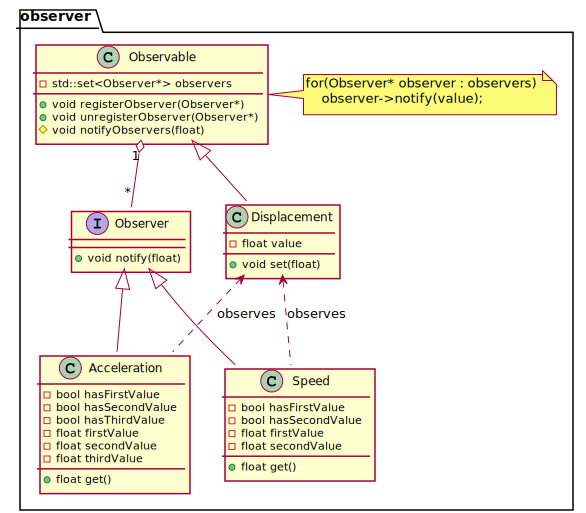

In [2]:
%%plantuml

@startuml

package observer {
    
    class Observable {
        - std::set<Observer*> observers
        + void registerObserver(Observer*)
        + void unregisterObserver(Observer*)
        # void notifyObservers(float)
    }
    note right of Observable
        for(Observer* observer : observers)
            observer->notify(value);
    end note

    interface Observer {
        + {abstract} void notify(float)
    }

    class Acceleration {
        - bool hasFirstValue
        - bool hasSecondValue
        - bool hasThirdValue
        - float firstValue
        - float secondValue
        - float thirdValue
        + float get()
    }
    class Speed {
        - bool hasFirstValue
        - bool hasSecondValue
        - float firstValue
        - float secondValue
        + float get()
    }

    class Displacement {
        - float value
        + void set(float)
    }

    Observable <|-- Displacement
    Observer <|-- Speed
    Observer <|-- Acceleration

    Observable "1" o-- "*" Observer
    Displacement <.. Speed : observes
    Displacement <.. Acceleration : observes
}

@enduml

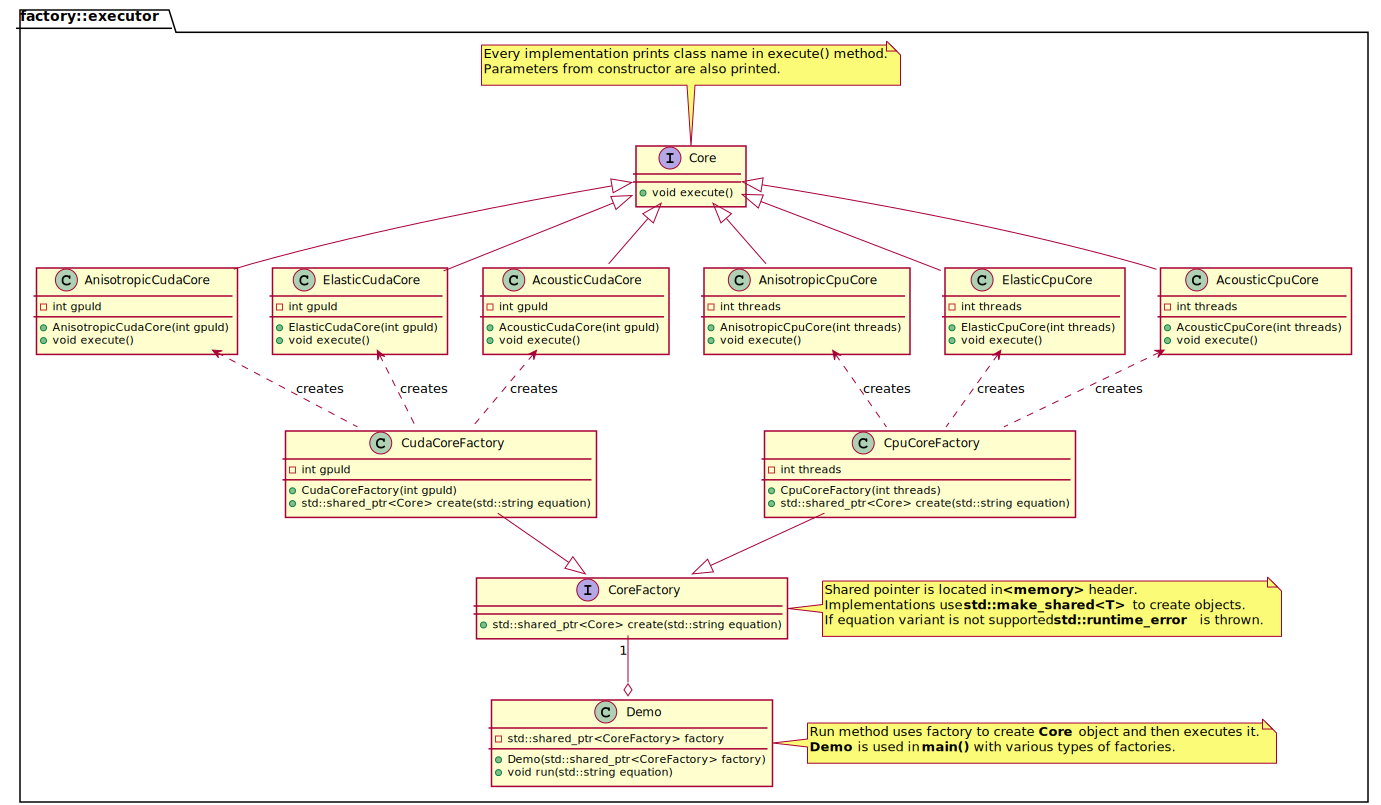

In [3]:
%%plantuml

@startuml

namespace factory::executor {

    interface Core {
        + void execute()
    }

    note top of Core
        Every implementation prints class name in execute() method.
        Parameters from constructor are also printed.
    end note

    class AcousticCpuCore {
        - int threads
        + AcousticCpuCore(int threads)
        + void execute()
    }

    class ElasticCpuCore {
        - int threads
        + ElasticCpuCore(int threads)
        + void execute()
    }

    class AnisotropicCpuCore {
        - int threads
        + AnisotropicCpuCore(int threads)
        + void execute()
    }

    class AcousticCudaCore {
        - int gpuId
        + AcousticCudaCore(int gpuId)
        + void execute()
    }

    class ElasticCudaCore {
        - int gpuId
        + ElasticCudaCore(int gpuId)
        + void execute()
    }

    class AnisotropicCudaCore {
        - int gpuId
        + AnisotropicCudaCore(int gpuId)
        + void execute()
    }

    Core <|-- AcousticCpuCore
    Core <|-- ElasticCpuCore
    Core <|-- AnisotropicCpuCore

    Core <|-- AcousticCudaCore
    Core <|-- ElasticCudaCore
    Core <|-- AnisotropicCudaCore

    interface CoreFactory {
        + std::shared_ptr<Core> create(std::string equation)
    }

    note right of CoreFactory
        Shared pointer is located in <b><memory></b> header.
        Implementations use <b>std::make_shared<T></b> to create objects.
        If equation variant is not supported <b>std::runtime_error</b> is thrown.
    end note

    class CpuCoreFactory {
        - int threads
        + CpuCoreFactory(int threads)
        + std::shared_ptr<Core> create(std::string equation)
    }

    CoreFactory <|-up- CpuCoreFactory

    class CudaCoreFactory {
        - int gpuId
        + CudaCoreFactory(int gpuId)
        + std::shared_ptr<Core> create(std::string equation)
    }

    CoreFactory <|-up- CudaCoreFactory

    CpuCoreFactory .up.> AcousticCpuCore : creates
    CpuCoreFactory .up.> ElasticCpuCore : creates
    CpuCoreFactory .up.> AnisotropicCpuCore : creates

    CudaCoreFactory .up.> AcousticCudaCore : creates
    CudaCoreFactory .up.> ElasticCudaCore : creates
    CudaCoreFactory .up.> AnisotropicCudaCore : creates

    class Demo {
        - std::shared_ptr<CoreFactory> factory
        + Demo(std::shared_ptr<CoreFactory> factory)
        + void run(std::string equation)
    }

    Demo  o-up- "1" CoreFactory

    note right of Demo
        Run method uses factory to create <b>Core</b> object and then executes it.
        <b>Demo</b> is used in <b>main()</b> with various types of factories.
    end note
}

@enduml

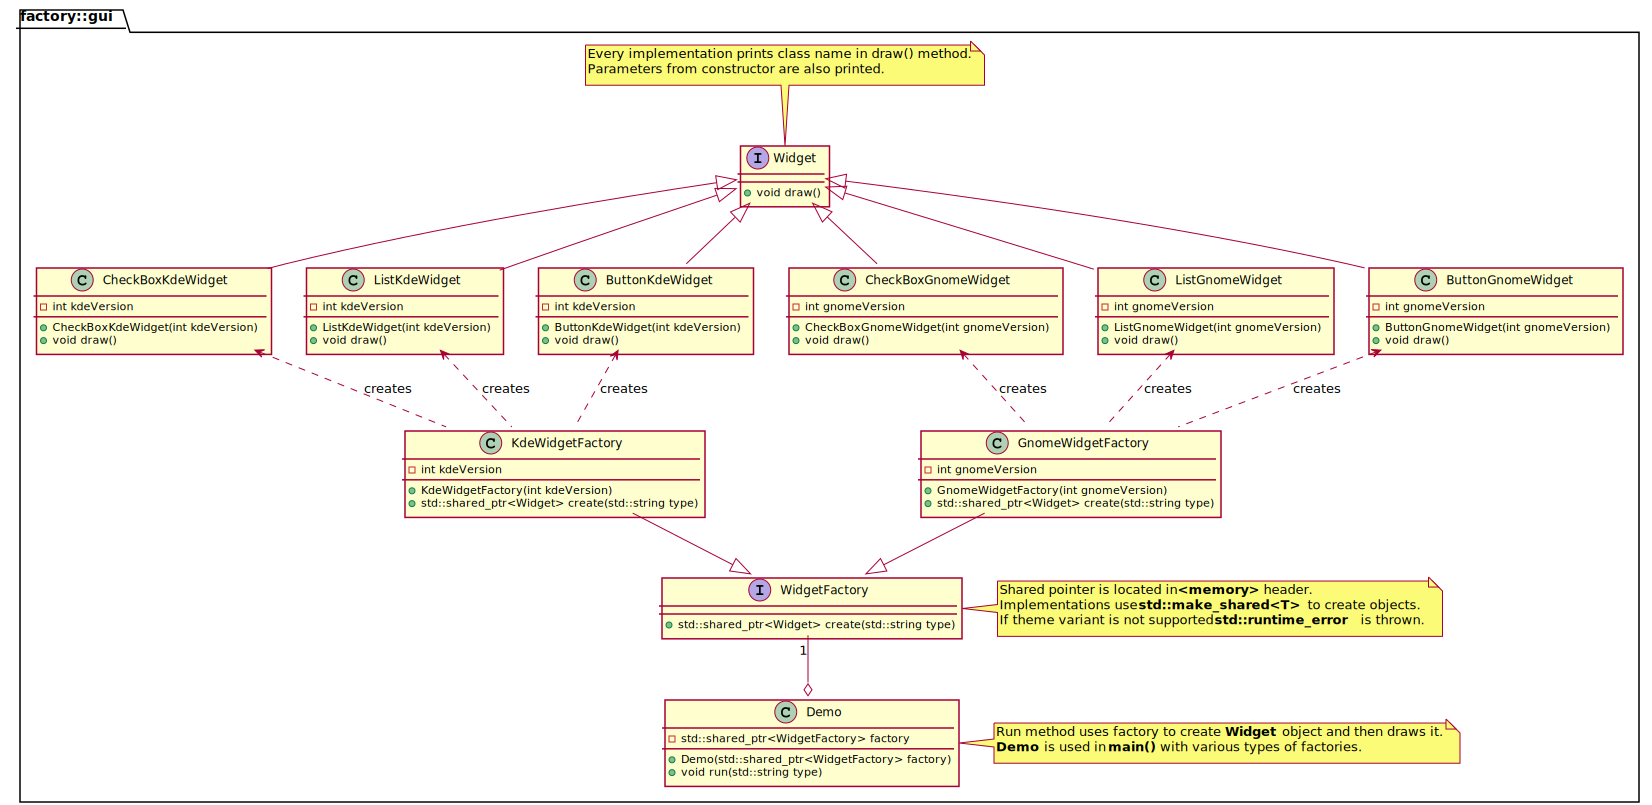

In [4]:
%%plantuml

@startuml

namespace factory::gui {

    interface Widget {
        + void draw()
    }

    note top of Widget
        Every implementation prints class name in draw() method.
        Parameters from constructor are also printed.
    end note

    class ButtonGnomeWidget {
        - int gnomeVersion
        + ButtonGnomeWidget(int gnomeVersion)
        + void draw()
    }

    class ListGnomeWidget {
        - int gnomeVersion
        + ListGnomeWidget(int gnomeVersion)
        + void draw()
    }

    class CheckBoxGnomeWidget {
        - int gnomeVersion
        + CheckBoxGnomeWidget(int gnomeVersion)
        + void draw()
    }

    class ButtonKdeWidget {
        - int kdeVersion
        + ButtonKdeWidget(int kdeVersion)
        + void draw()
    }

    class ListKdeWidget {
        - int kdeVersion
        + ListKdeWidget(int kdeVersion)
        + void draw()
    }

    class CheckBoxKdeWidget {
        - int kdeVersion
        + CheckBoxKdeWidget(int kdeVersion)
        + void draw()
    }

    Widget <|-- ButtonGnomeWidget
    Widget <|-- ListGnomeWidget
    Widget <|-- CheckBoxGnomeWidget

    Widget <|-- ButtonKdeWidget
    Widget <|-- ListKdeWidget
    Widget <|-- CheckBoxKdeWidget

    interface WidgetFactory {
        + std::shared_ptr<Widget> create(std::string type)
    }

    note right of WidgetFactory
        Shared pointer is located in <b><memory></b> header.
        Implementations use <b>std::make_shared<T></b> to create objects.
        If theme variant is not supported <b>std::runtime_error</b> is thrown.
    end note

    class GnomeWidgetFactory {
        - int gnomeVersion
        + GnomeWidgetFactory(int gnomeVersion)
        + std::shared_ptr<Widget> create(std::string type)
    }

    WidgetFactory <|-up- GnomeWidgetFactory

    class KdeWidgetFactory {
        - int kdeVersion
        + KdeWidgetFactory(int kdeVersion)
        + std::shared_ptr<Widget> create(std::string type)
    }

    WidgetFactory <|-up- KdeWidgetFactory

    GnomeWidgetFactory .up.> ButtonGnomeWidget : creates
    GnomeWidgetFactory .up.> ListGnomeWidget : creates
    GnomeWidgetFactory .up.> CheckBoxGnomeWidget : creates

    KdeWidgetFactory .up.> ButtonKdeWidget : creates
    KdeWidgetFactory .up.> ListKdeWidget : creates
    KdeWidgetFactory .up.> CheckBoxKdeWidget : creates

    class Demo {
        - std::shared_ptr<WidgetFactory> factory
        + Demo(std::shared_ptr<WidgetFactory> factory)
        + void run(std::string type)
    }

    Demo  o-up- "1" WidgetFactory

    note right of Demo
        Run method uses factory to create <b>Widget</b> object and then draws it.
        <b>Demo</b> is used in <b>main()</b> with various types of factories.
    end note
}

@enduml

#### GoogleTest

In [5]:
! rm -rf googletest
! git clone --depth=1 --branch=release-1.10.0 https://github.com/google/googletest.git
! rm -rf googletest/.git
! cd googletest && mkdir build && cd build && cmake ../ && make -j4

Cloning into 'googletest'...
remote: Enumerating objects: 288, done.
remote: Counting objects: 100% (288/288), done.
remote: Compressing objects: 100% (272/272), done.
remote: Total 288 (delta 87), reused 40 (delta 11), pack-reused 0
Receiving objects: 100% (288/288), 987.43 KiB | 206.00 KiB/s, done.
Resolving deltas: 100% (87/87), done.
Note: switching to '703bd9caab50b139428cea1aaff9974ebee5742e'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

-- The C compiler identification is GNU 9.3.0
-- The CXX compiler identification

#### Editing the code:

In [5]:
! clion project

OpenJDK 64-Bit Server VM warning: Option UseConcMarkSweepGC was deprecated in version 9.0 and will likely be removed in a future release.
2020-12-09 08:50:47,599 [  59839]   WARN - .diagnostic.PerformanceWatcher - UI was frozen for 5778ms, details saved to /home/student/.cache/JetBrains/CLion2020.2/log/threadDumps-freeze-20201209-085046-CL-202.7319.72-RandomAccessFile.readBytes-5sec 
2020-12-09 08:51:33,393 [ 105633]   WARN - .diagnostic.PerformanceWatcher - UI was frozen for 8374ms, details saved to /home/student/.cache/JetBrains/CLion2020.2/log/threadDumps-freeze-20201209-085130-CL-202.7319.72-ZipFile.getEntry-8sec 
2020-12-09 08:51:48,388 [ 120628]   WARN - .diagnostic.PerformanceWatcher - UI was frozen for 12086ms, details saved to /home/student/.cache/JetBrains/CLion2020.2/log/threadDumps-freeze-20201209-085141-CL-202.7319.72-ChangesViewManager_ChangesViewToolWindowPanel._init_-12sec 
2020-12-09 08:51:50,370 [ 122610]   WARN - pl.local.NativeFileWatcherImpl - Watcher terminated wi

2020-12-09 09:11:07,249 [1279489]  ERROR - tellij.util.IdempotenceChecker - CLion 2020.2.3  Build #CL-202.7319.72 
2020-12-09 09:11:07,250 [1279490]  ERROR - tellij.util.IdempotenceChecker - JDK: 11.0.8; VM: OpenJDK 64-Bit Server VM; Vendor: JetBrains s.r.o. 
2020-12-09 09:11:07,251 [1279491]  ERROR - tellij.util.IdempotenceChecker - OS: Linux 
2020-12-09 09:11:07,251 [1279491]  ERROR - tellij.util.IdempotenceChecker - Last Action: EditorPaste 
2020-12-09 09:13:26,405 [1418645]   WARN - tEnter.JsonSmartEnterProcessor - com.intellij.openapi.progress.ProcessCanceledException 
java.util.concurrent.ExecutionException: com.intellij.openapi.progress.ProcessCanceledException
	at java.base/java.util.concurrent.CompletableFuture.reportGet(CompletableFuture.java:395)
	at java.base/java.util.concurrent.CompletableFuture.get(CompletableFuture.java:2022)
	at com.jetbrains.cidr.lang.daemon.clang.ClangUtils.waitCancelAware(ClangUtils.java:1145)
	at com.jetbrains.cidr.lang.daemon.clang.clangd.completi